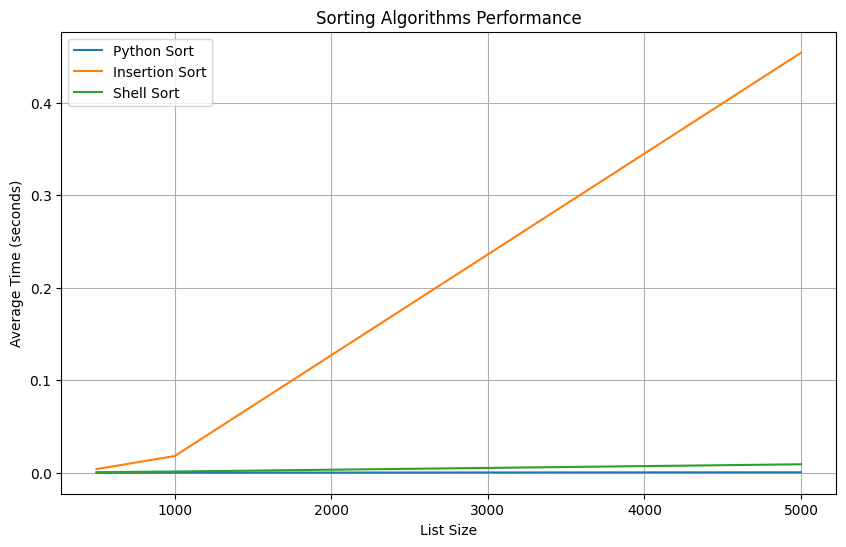

In [2]:
import argparse
import random
import time
import matplotlib.pyplot as plt

def get_me_random_list(n):
    """Generate list of n elements in random order
    
    :params: n: Number of elements in the list
    :returns: A list with n elements in random order
    """
    a_list = list(range(n))
    random.shuffle(a_list)
    return a_list

def insertion_sort(a_list):
    for index in range(1, len(a_list)):
        current_value = a_list[index]
        position = index

        while position > 0 and a_list[position - 1] > current_value:
            a_list[position] = a_list[position - 1]
            position = position - 1

        a_list[position] = current_value

def shellSort(alist):
    sublistcount = len(alist) // 2
    while sublistcount > 0:
        for startposition in range(sublistcount):
            gapInsertionSort(alist, startposition, sublistcount)
        sublistcount = sublistcount // 2

def gapInsertionSort(alist, start, gap):
    for i in range(start + gap, len(alist), gap):
        currentvalue = alist[i]
        position = i

        while position >= gap and alist[position - gap] > currentvalue:
            alist[position] = alist[position - gap]
            position = position - gap

        alist[position] = currentvalue

def python_sort(a_list):
    """
    Use Python built-in sorted function

    :param a_list:
    :return: the sorted list
    """
    return sorted(a_list)

if __name__ == "__main__":
    """Main entry point"""
    list_sizes = [500, 1000, 5000]

    python_sort_times = []
    insertion_sort_times = []
    shell_sort_times = []

    for the_size in list_sizes:
        total_time = 0
        for i in range(100):
            mylist = get_me_random_list(the_size)
            start = time.time()
            sorted_list = python_sort(mylist)
            time_spent = time.time() - start
            total_time += time_spent
        avg_time = total_time / 100
        python_sort_times.append(avg_time)
        print(f"Python sort took {avg_time:10.7f} seconds to run, on average for a list of {the_size} elements")

        total_time = 0
        for i in range(100):
            mylist = get_me_random_list(the_size)
            start = time.time()
            insertion_sort(mylist)
            time_spent = time.time() - start
            total_time += time_spent
        avg_time = total_time / 100
        insertion_sort_times.append(avg_time)
        print(f"Insertion sort took {avg_time:10.7f} seconds to run, on average for a list of {the_size} elements")

        total_time = 0
        for i in range(100):
            mylist = get_me_random_list(the_size)
            start = time.time()
            shellSort(mylist)
            time_spent = time.time() - start
            total_time += time_spent
        avg_time = total_time / 100
        shell_sort_times.append(avg_time)
        print(f"Shell sort took {avg_time:10.7f} seconds to run, on average for a list of {the_size} elements")
        print("\n" + "="*50 + "\n")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(list_sizes, python_sort_times, label='Python Sort')
    plt.plot(list_sizes, insertion_sort_times, label='Insertion Sort')
    plt.plot(list_sizes, shell_sort_times, label='Shell Sort')
    plt.xlabel('List Size')
    plt.ylabel('Average Time (seconds)')
    plt.title('Sorting Algorithms Performance')
    plt.legend()
    plt.grid(True)
    plt.show()